# Titanic

Utilizziamo il dataset Titanic per provare nuovamente il nostro metodo K-NN. Vogliamo prevedere se un passeggero con determinate caratteristiche sarebbe sopravvissuto o meno al naufragio.

# Import data

In [2]:
import pandas as pd
df = pd.read_csv('data/titanic.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


La colonna 'Survived' è la nostra variabile target. Se vale 0 vuol dire che il passeggero non è sopravvissuto, se vale 1 vuol dire che è sopravvissuto. Visualizziamo il numero di sopravvissuti e non sopravvissuti:

In [4]:
print(df.groupby('Survived').size())

Survived
0    549
1    342
dtype: int64


Possiamo vedere che il dataset contiene 891 record, 549 relativi a passeggeri sopravvissuti e 342 relativi a passeggeri non sopravvissuti. Visualizziamo un grafico riepilogativo:

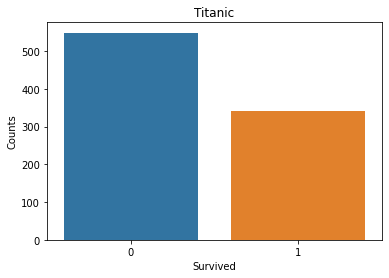

In [5]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt


sns.countplot(x="Survived", data=df)
plt.title("Titanic")
plt.xlabel("Survived")
plt.ylabel("Counts")
plt.show()

Effettuiamno ora alcune modifiche al nostro dataset per poterlo utilizare. Dall'analisi delle colonne, vediamo che ci sono dei campi che non possono essere elaborati in formato numerico (il cognome del passeggero ad esempio) e quindi li togliamo. lasciando però la colonna 'Sex':

In [6]:
df1 = df.drop(columns=['Name', 'Ticket','Cabin','PassengerId','Embarked'])

In [7]:
df['Sex'].head()

0      male
1    female
2    female
3    female
4      male
Name: Sex, dtype: object

Sostituiamo ora i valori 'male' e 'female' con valori numerici, per poterli utilizzare nell'elaborazione:

In [8]:
df1['Sex'] = df['Sex'].apply(lambda x: 1 if x == "male" else 0)
df1

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,1,22.0,1,0,7.2500
1,1,1,0,38.0,1,0,71.2833
2,1,3,0,26.0,0,0,7.9250
3,1,1,0,35.0,1,0,53.1000
4,0,3,1,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000
887,1,1,0,19.0,0,0,30.0000
888,0,3,0,NaN,1,2,23.4500
889,1,1,1,26.0,0,0,30.0000


Vediamo inoltre che la colonna 'Age' (e forse anche altre colonne...) hanno dei valori NaN. Togliamoli:

In [9]:
df1 = df1.dropna(how='any',axis=0) 
df1

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,1,22.0,1,0,7.2500
1,1,1,0,38.0,1,0,71.2833
2,1,3,0,26.0,0,0,7.9250
3,1,1,0,35.0,1,0,53.1000
4,0,3,1,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
885,0,3,0,39.0,0,5,29.1250
886,0,2,1,27.0,0,0,13.0000
887,1,1,0,19.0,0,0,30.0000
889,1,1,1,26.0,0,0,30.0000


Vediamo che i record da utilizzare rimasti sono 714, contro gli 891 iniziali.
Trasformiamo ora il nostro dataframe in una matrice Numpy per l'elaborazione:

In [10]:
import numpy as np
dfnp = df1.to_numpy()
dfnp

array([[ 0.    ,  3.    ,  1.    , ...,  1.    ,  0.    ,  7.25  ],
       [ 1.    ,  1.    ,  0.    , ...,  1.    ,  0.    , 71.2833],
       [ 1.    ,  3.    ,  0.    , ...,  0.    ,  0.    ,  7.925 ],
       ...,
       [ 1.    ,  1.    ,  0.    , ...,  0.    ,  0.    , 30.    ],
       [ 1.    ,  1.    ,  1.    , ...,  0.    ,  0.    , 30.    ],
       [ 0.    ,  3.    ,  1.    , ...,  0.    ,  0.    ,  7.75  ]])

Separiamo ora le osservazioni (cioè le variabili indipendenti) dalla variabile target (cioè dalal variabile dipendente, in questo caso 'Survived'):

In [11]:
x=dfnp[:,1:] # prendiamo tutti i dati tranne l'ultima colonna -> variabili indipendenti, osservazioni
y=dfnp[:,0] # prendiamo solo l'ultima colonna -> variabile dipendente, target
x,y

(array([[ 3.    ,  1.    , 22.    ,  1.    ,  0.    ,  7.25  ],
        [ 1.    ,  0.    , 38.    ,  1.    ,  0.    , 71.2833],
        [ 3.    ,  0.    , 26.    ,  0.    ,  0.    ,  7.925 ],
        ...,
        [ 1.    ,  0.    , 19.    ,  0.    ,  0.    , 30.    ],
        [ 1.    ,  1.    , 26.    ,  0.    ,  0.    , 30.    ],
        [ 3.    ,  1.    , 32.    ,  0.    ,  0.    ,  7.75  ]]),
 array([0., 1., 1., 1., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 1., 0., 0.,
        0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1.,
        1., 0., 0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0.,
        1., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1., 0., 1.,
        0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0.,
        0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0.,
        0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0

Visualizziamo le prime 10 righe:

In [12]:
print(x[:10])
print(f'y = {y[:10]}')

[[ 3.      1.     22.      1.      0.      7.25  ]
 [ 1.      0.     38.      1.      0.     71.2833]
 [ 3.      0.     26.      0.      0.      7.925 ]
 [ 1.      0.     35.      1.      0.     53.1   ]
 [ 3.      1.     35.      0.      0.      8.05  ]
 [ 1.      1.     54.      0.      0.     51.8625]
 [ 3.      1.      2.      3.      1.     21.075 ]
 [ 3.      0.     27.      0.      2.     11.1333]
 [ 2.      0.     14.      1.      0.     30.0708]
 [ 3.      0.      4.      1.      1.     16.7   ]]
y = [0. 1. 1. 1. 0. 0. 0. 1. 1. 1.]


# Split data into training/test set

Una volte preparate i dati, partiamo con il nostro metodo. la prima cosa da fare è separare i dati in training set e test set: 

In [13]:
# https://scikit-learn.org/stable/ libreria per il Machine Learning in Python

# come per altri metodi di ML, dobbiamo prendere i nostri valori delle osservazioni e splittarle in due insiemi:
# training set: è il sottoinsieme delle osservazioni che serve al nostro metodo per imparare
# test set: è il sottoinsieme delle osservazioni che serve al nostro metodo per capire se ha imparato bene
from sklearn.model_selection import train_test_split # suddivide le osservazioni nei due insiemi

X_train, X_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size = 0.33, # by default is 75%-25%
                                                    # shuffle is set True by default,
                                                    stratify = y, # per mantenere le proporzioni che ci sono nei dati di partenza
                                                    random_state = 123) # fix random seed for replicability

Vediamo come è stata fatta la suddivisione in traning set e test set:

In [14]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((478, 6), (478,), (236, 6), (236,))

Come vediamo X_train è una matrice da 468 righe (cioè passeggeri) e 6 colonne (le varie registrazioni: età, sesso, ...), y_train è un vettore di 478 righe (le informazioni riguardanti la sopravvivenza o meno del passeggero), X_test è una matrice da 236 righe (cioè passeggeri) e 6 colonne (le varie registrazioni: età, sesso, ...) e infine y_test è un vettore di 236 righe (le informazioni riguardanti la sopravvivenza o meno del passeggero). X_train e y_train verranno usate per allenare il metodo, X_test e y_test verranno usate per vedere se il metodo ha imparato bene.
Vediamo le prime 10 righe di X_train e y_train:

In [15]:
print(X_train[:10])
print(f'y_train = {y_train[:10]}')

[[ 2.      0.     24.      0.      0.     13.    ]
 [ 1.      0.     22.      1.      0.     66.6   ]
 [ 3.      1.     24.      2.      0.     24.15  ]
 [ 3.      0.     16.      0.      0.      7.75  ]
 [ 2.      0.     27.      1.      0.     13.8583]
 [ 3.      0.     26.      1.      0.     16.1   ]
 [ 2.      0.     27.      1.      0.     21.    ]
 [ 3.      1.     25.      0.      0.      7.65  ]
 [ 3.      1.     47.      0.      0.      9.    ]
 [ 1.      1.     62.      0.      0.     26.55  ]]
y_train = [0. 1. 0. 1. 1. 0. 0. 0. 0. 0.]


# Train the classifier

Alleniamo il nostro metodo K-NN:

In [16]:
# importiamo il metodo che vogliamo utilizzara (tra i tanti disponibili...)
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors=3) # impostiamo l'unico parametro (il numero di vicini)

# prima parte: dobbiamo fare in modo che il metodo impari dalle informazioni a disposizione
# NB: notare che il metodo utilizza sia X_train che y_train, perché deve capire se sta predicendo correttamente
neigh.fit(X_train, y_train) # "alleniamo" il metodo con i dati del training set

# seconda parte: vediamo se il metodo ha imparato bene facendogli prevedere i risultati 
# NB: notare che c'è solo X perché le y devono essere previste dal metodo
predict = neigh.predict(X_test) # proviamo a fare una previsione sui dati del test set

# visualizziamo il risultato (solo i primi dieci pazienti)
print(f'dati predetti dal metodo =                {predict[:10]}') # dati predetti dal metodo
print(f'dati reali presenti nel dataset di test = {y_test[:10]}') # dati effettivi presenti nel test set

dati predetti dal metodo =                [1. 0. 0. 0. 0. 0. 1. 0. 0. 1.]
dati reali presenti nel dataset di test = [1. 0. 0. 0. 1. 0. 1. 0. 1. 1.]


Vediamo come ha funzionato il nostro metodo analizzando i primi 10 passeggeri (ricordiamoci che 1 vuol dire che il passeggero è sopravvissuto, 0 che non è sopravvissuto)<br>

- veri positivi (true positive, __TP__): tre passeggeri (nn. 1, 7 e 10) sono stati classificati come sopravvissuti ed effettivamente lo erano
- veri negativi (true negative, __TN__): cinque passeggeri (nn. 2, 3, 4, 6 e 8) sono stati classificati come __non__ sopravvissuti ed effettivamente non sono sopravvissuti
- falsi negativi (false negative, __FN__): nessun passeggero è stato classificato come __non__ sopravvissuto anche se è sopravvissuto 
- falsi positivi (false positive, __FP__): due passeggeri (nn. 5 e 9) sono stati classificati come sopravvissuti anche se in realtà __non__ sono sopravvissuti 

valutiamo però ora i risultati nella loro interezza.

# Evaluate the results

Per valutare il nostro metodo, visualizziamo prima la cosiddetta "confusion matrix"

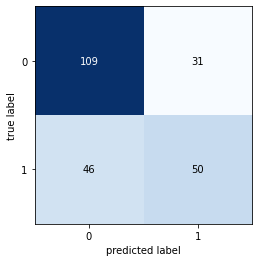

In [17]:
#plots IMPORTS
from mlxtend.plotting import plot_confusion_matrix
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

plot_confusion_matrix(confusion_matrix(y_test, predict), cmap=plt.cm.Blues)
plt.show()

Vediamo di capire il suo significato, riprendendo l'esempio precedente e tenendo presente che le __predicted label__ rappresentano le previsioni del metodo (1 il paziente è sopravvissuto, 0 no) mentre le __true label__ rappresentano i dati reali presenti nel dataset (1 il paziente è sopravvissuto, 0 no):

- veri positivi (true positive, __TP__): 50 pazienti sono stati classificati come sopravvissuti (predicted label = 1) ed effettivamente sono sopravvissuti (true label = 1)
- veri negativi (true negative, __TN__): 108 pazienti sono stati classificati come __non__ sopravvissuti (predicted label = 0) ed effettivamente __non__ sono sopravvissuti (true label = 0)
- falsi negativi (false negative, __FN__): 46 pazienti sono stati classificati come __non__ sopravvissuti (predicted label = 0)  anche se in realtà sono sopravvissuti (true label = 1)
- falsi positivi (false positive, __FP__): 32 pazienti sono stati classificati come sopravvissuti (predicted label = 1) anche se in realtà __non__ sono sopravvissuti (true label = 0)

Per avere comunque un quadro riassuntivo, stampiamo il report con i valori dei vari indicatori:

In [18]:
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

         0.0       0.70      0.78      0.74       140
         1.0       0.62      0.52      0.56        96

    accuracy                           0.67       236
   macro avg       0.66      0.65      0.65       236
weighted avg       0.67      0.67      0.67       236



Come possiamo vedere, il metodo funziona meglio per prevedere se un pazione __non__ è sopravvissuto: la precision e la recall sono infatti maggiori quando il target è uguale a 0 (passeggero non sopravvissuto)

# Utilizzare il metodo

Al di là dei risultati che ci hanno dato i nostri indicatori, supponiamo che il nostro metodo sia un ottimo metodo per valutare (classificare) se una persona è sopravvissuta o no: come possiamo applicarlo ai dati di un passeggero? Supponiamo per esempio che Maria sia una passeggera con le seguenti carattreristiche:

In [19]:
from tabulate import tabulate

info = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare'] # nome delle misurazioni

Maria= [1, 0, 35.0, 1, 0, 53.100] # valore delle misurazioni
print(tabulate([Maria], headers=info))

  Pclass    Sex    Age    SibSp    Parch    Fare
--------  -----  -----  -------  -------  ------
       1      0     35        1        0    53.1


Proviamo a far girare il nostro metodo con questi dati e vediamo che previsione fa:

In [20]:
# previsione per Maria
Maria= [[1, 0, 35.0, 1, 0, 53.100]]
predictMaria = neigh.predict(Maria)
predictMaria

array([1.])

La risposta è 1, cioà il metodo dice che Maria sarebbe sopravvissuta (cioè, visto che stiamo usando il metodo K-NN, Maria è più 'vicina' a passeggeri che sono sopravvissuti). Ma vediamo ora che cosa sarebbe successo se Maria avesse un 65 anni invece di 35:

In [21]:
# nuova previsione per Maria
Maria= [[1, 0, 65.0, 1, 0, 53.100]]
predictMaria = neigh.predict(Maria)
predictMaria

array([0.])

La risposta è 1, cioè il metodo dice che Maria, con questi nuovi valori, ha il diabete (cioè è più 'vicina' a pazienti che hanno il diabete).

In [25]:
def find_k(training_set_X, training_set_y, testing_set_X, testing_set_y, max_k=11):
    y = [0,0]
    for i in range(1,int(max_k)+1,2):
        neigh = KNeighborsClassifier(n_neighbors=i)
        neigh.fit(training_set_X, training_set_y)
        predict_knn = neigh.predict(testing_set_X)
        x = [i, float(classification_report(testing_set_y, predict_knn, output_dict=True).get("accuracy"))]
        if (x[1] > y[1]):
            y = x
        else:
            pass
    print(f'{y[0]} => {y[1]}')
find_k(X_train, y_train, X_test, y_test)

1 => 0.6991525423728814
